Project Title:
Titanic Survival Prediction 
==========================
### Overview
This project is based on the Titanic dataset, which aims to predict whether a passenger survived or not based on features such as age, sex, class, fare, etc. And implementation this using Python and their libraries such as pandas, numpy, matplotlib, and scikit-learn.

📦 Tools & Libraries Used:
Python 3.x
pandas
numpy
matplotlib
seaborn
Jupyter Notebook or .py script
conda virtual environment (tfod310)

Dataset Description After Cleaning
=====================================
| Column Name | Description                                                          |
| ----------- | -------------------------------------------------------------------- |
| `survived`  | Target variable (1 = Survived, 0 = Not Survived)                     |
| `pclass`    | Passenger class (1 = First, 2 = Second, 3 = Third)                   |
| `sex`       | Gender of the passenger (0 = female, 1 = male)                       |
| `age`       | Age of the passenger                                                 |
| `sibsp`     | Number of siblings/spouses aboard                                    |
| `parch`     | Number of parents/children aboard                                    |
| `fare`      | Fare paid                                                            |
| `embarked`  | Port of Embarkation (0 = Cherbourg, 1 = Queenstown, 2 = Southampton) |

 Data Cleaning
 ================
Removed missing values.
Converted categorical variables (e.g., sex, embarked) into numerical values using label encoding.
Checked for duplicates and outliers.

Independent and Dependent Variables
=====================================
Dependent variable: survived
Independent variables: pclass, sex, age, sibsp, parch, fare, embarked

Data Visualization
==================
📊 Correlation Matrix
Used a heatmap to identify the relationship between variables.
Interpretation:
Strong negative correlation between sex and survived: means females were more likely to survive.
Slight correlation between fare and survived: passengers who paid more were more likely to survive.
📊 Survival Rate by Passenger Class
Interpretation:
Passengers in First Class had the highest survival rate.
Passengers in Third Class had the lowest survival rate.

✅ Status:
The project is inProcess
✅ Data cleaned
✅ Correlation analysis done
✅ Survival bar plot by class done

In [2]:
# import necessary libraries for data Preprocessing visualization and modeling
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# Load the Titanic dataset
# Ensure the path is correct for your local environment
data = "F:\\STEMETA_Intership_Projects\\TitanicAPI\\titanic_dataset.csv"
data = pd.read_csv(data)
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(data.head(5))

First 5 rows of the dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Display dataset shape
print("\nDataset Shape:")
len(data)
# Display dataset information
print("\nDataset Info:")
data.info()
# Display dataset summary
print("\nSummary of Numerical Columns:")
display(data.describe())
# Display missing values per column
print("\nMissing Values Per Column:")
print(data.isnull().sum())



Dataset Shape:

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB

Summary of Numerical Columns:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Missing Values Per Column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


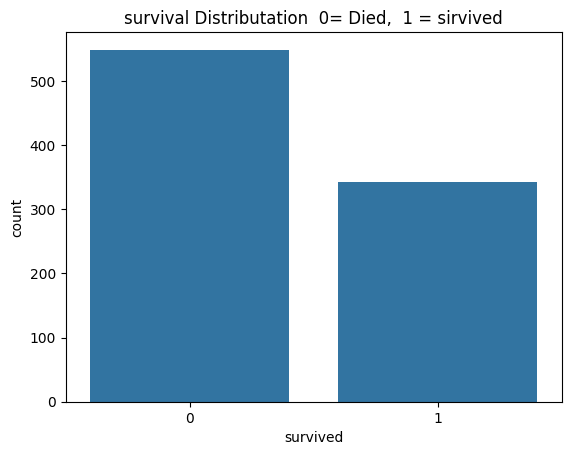

In [5]:
# Visualize the distribution of the 'survived' column '0= Died,  1 = sirvived'
plt.Figure(figsize= (8, 5))
sns.countplot(x= 'survived', data = data)
plt.title('survival Distributation  0= Died,  1 = sirvived')
plt.show()

In [6]:
# Import the SimpleImputer class from scikit-learn, which is used for handling missing data
from sklearn.impute import SimpleImputer
# Create an instance of SimpleImputer to fill missing values using the 'median' strategy
# This means missing values will be replaced with the median value of the column

age_imputer = SimpleImputer(strategy = 'median')

# Apply the imputer to the 'age' column of the dataset
# The fit_transform method first calculates the median of the 'age' column (ignoring NaNs),
# and then replaces all missing values in 'age' with that median value
# Note: data[['age']] keeps the input as a 2D array, which is required by SimpleImputer

data['age'] = age_imputer.fit_transform(data[['age']])

In [7]:
# impute Embarked with most frequent value 
data['embarked'] = SimpleImputer(strategy = 'most_frequent').fit_transform(data[['embarked']]).ravel()

#Drop Deck columns 
data.drop(columns = ['deck'], inplace = True)

In [8]:
#Confirm missing values handled

print("\nRemeining Missing Values:")
print(data.isnull().sum())



Remeining Missing Values:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


In [9]:
# Display the name of columns in data set 
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [10]:
# Import LabelEncoder for converting categorical values to numeric labels
from sklearn.preprocessing import LabelEncoder

# Create instances of LabelEncoder for 'sex' and 'embarked'
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

# Fit and transform the 'sex' column, then replace it in the dataset
data['sex'] = le_sex.fit_transform(data['sex'])

# Fit and transform the 'embarked' column, then replace it in the dataset
data['embarked'] = le_embarked.fit_transform(data['embarked'])

# Print mappings to see which label got which number
print("Sex encoding:", dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_))))
print("Embarked encoding:", dict(zip(le_embarked.classes_, le_embarked.transform(le_embarked.classes_))))


Sex encoding: {'female': 0, 'male': 1}
Embarked encoding: {'C': 0, 'Q': 1, 'S': 2}


In [11]:
#Drop irrelevant features
data.drop(columns = ['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], inplace=True)

print("\nData After Preprocessing: ")
display(data.head())


Data After Preprocessing: 


,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [12]:
# Independent variables
x = data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

# Dependent variable
y = data['survived']


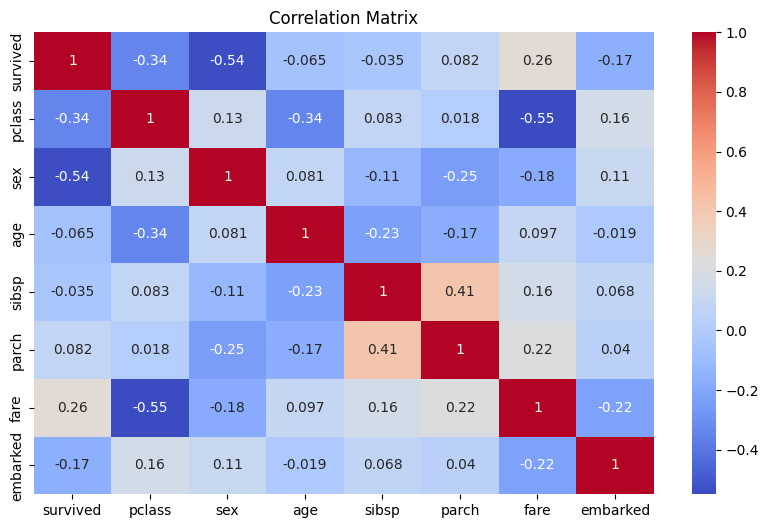

In [13]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

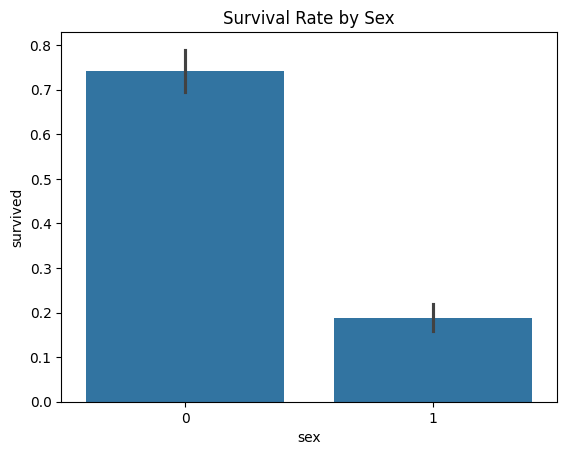

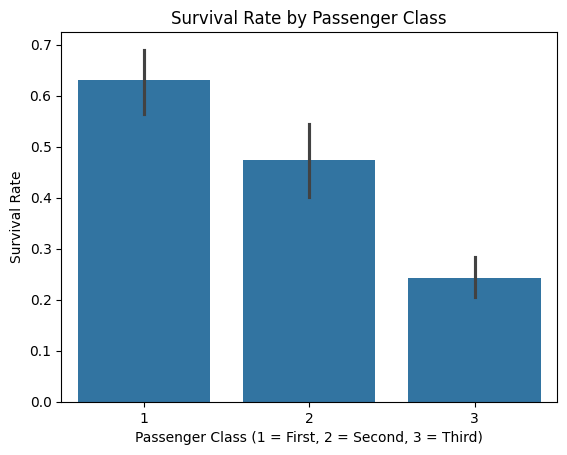

In [14]:
# Sex vs Survival
sns.barplot(x='sex', y='survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()

# Plotting survival rate by passenger class
sns.barplot(x='pclass', y='survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (1 = First, 2 = Second, 3 = Third)')
plt.ylabel('Survival Rate')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pickle  # <-- Add this import

# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Save the fitted scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8045
Random Forest Accuracy: 0.8101
SVM Accuracy: 0.8156
KNN Accuracy: 0.7989


In [18]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Train models
models = {
    "logistic": LogisticRegression(),
    "random_forest": RandomForestClassifier(),
    "svm": SVC(probability=True),
    "knn": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    
    # Save model using pickle
    with open(f"{name}_model.pkl", "wb") as f:
        pickle.dump(model, f)


In [19]:
import os
os.rename("random_forest_model.pkl", "model.pkl")
